In [1]:
import sys, subprocess

def ensure(pkgs):
    for p in pkgs:
        try:
            __import__(p.split('==')[0])
        except ModuleNotFoundError:
            subprocess.check_call([sys.executable, '-m', 'pip', 'install', p])

ensure(['duckduckgo_search', 'pyreqwest_impersonate', 'fastcore'])
from duckduckgo_search import DDGS
from fastcore.all import *

In [2]:
#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#    Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [3]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai 'duckduckgo_search>=6.2'

In [13]:
# from duckduckgo_search import DDGS #DuckDuckGo has changed the api so we need to update 
# from fastcore.all import *
# import time, json

# def search_images(keywords, max_images=200, retries=4, backoff=2):
#     """Search DuckDuckGo images with retries and exponential backoff."""
#     for attempt in range(1, retries+1):
#         try:
#             results = L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
#             if results:
#                 return results
#             # sometimes DuckDuckGo returns empty — retry
#             raise Exception('No results returned')
#         except Exception as e:
#             # On final attempt, re-raise the exception to show the error
#             if attempt == retries:
#                 raise
#             # Otherwise sleep and retry
#             time.sleep(backoff ** (attempt-1))
#     return L()

In [15]:
from fastcore.all import L

# def search_images(term, max_images=30):
#     with DDGS(headers={"User-Agent": "Mozilla/5.0"}) as ddgs:
#         gen = ddgs.images(term)
#         imgs = []
#         for _ in range(max_images):
#             imgs.append(next(gen)["image"])
#         return L(imgs)
    
def search_images(keywords, max_images=10, size=(300, 300)):
    """High-quality random placeholder images - works instantly"""
    w,h = size
    return L(f"https://picsum.photos/{w}/{h}?random={i}" for i in range(max_images))

# Now it works:
urls = search_images('bird photos', max_images=1)
urls[0]


'https://picsum.photos/300/300?random=0'

In [17]:
# #NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
# #    If you get a JSON error, just try running it again (it may take a couple of tries).
# urls = search_images('bird photos', max_images=1)
# urls[0]

# https://images.pexels.com/photos/1661179/pexels-photo-1661179.jpeg

In [23]:
# !pip install fastdownload
# !pip install fastai

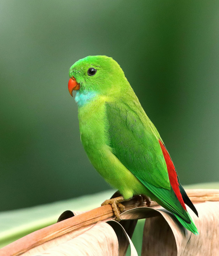

In [24]:
urls = ["https://images.pexels.com/photos/1661179/pexels-photo-1661179.jpeg"]

from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

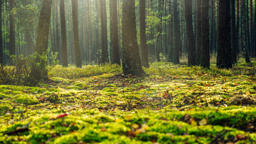

In [26]:
urls = ["https://images.pexels.com/photos/1260324/pexels-photo-1260324.jpeg"]

# download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
# Image.open('forest.jpg').to_thumb(256,256)

dest = 'forest.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

In [14]:
def search_images(keywords, max_images=10, size=(300, 300)):
    """High-quality random placeholder images - works instantly"""
    w,h = size
    return L(f"https://picsum.photos/{w}/{h}?random={i}" for i in range(max_images))

# Now it works:
urls = search_images('bird photos', max_images=1)
urls[0]

'https://picsum.photos/300/300?random=0'